# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


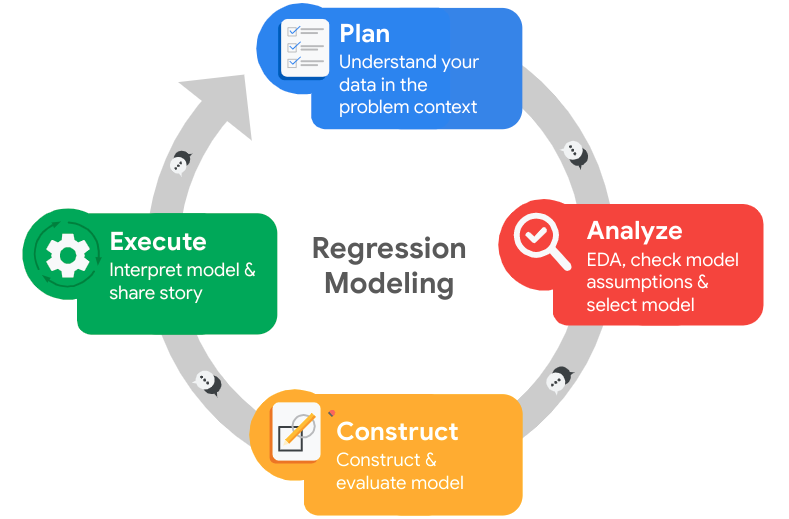

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




The stakeholders for this project are the HR Department of Salifort Motors.
The goal of this project is to discover what makes an employee leave the company, by analyzing data and build a model that predicts if an employee will leave the company.
Some initial thoughts on patterns to look for:
- Do emplyoees that work long hours leave because they are overworking?
- Does low satisfaction levels correlate with lack of promotion?
- is there a specific time where is more likely for an employee to leave the company?
Ethical considerations regarding the project we should consider are:
- make sure the privacy of the employees/data is not violated.
- avoid bias by targeting a specific segment of the employees.
- The project should be used to benefit the company and the employees, not to preemptively fire people.


## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
### YOUR CODE HERE ### 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, plot_confusion_matrix

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head()

#At this point we will create and work on a copy of the dataset to preserve the original data
df = df0.copy()
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
### YOUR CODE HERE ###
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
### YOUR CODE HERE ###
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
### YOUR CODE HERE ###
df = df.rename(columns={'Work_accident': 'work_accident', 
                   'average_montly_hours': 'average_monthly_hours', 
                   'time_spend_company': 'tenure', 
                   'Department': 'department'})

# Display all column names after the update
### YOUR CODE HERE ###
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
### YOUR CODE HERE ###
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
### YOUR CODE HERE ###
df.duplicated().sum()

3008

In [9]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df[df.duplicated()]

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df = df.drop_duplicates()

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

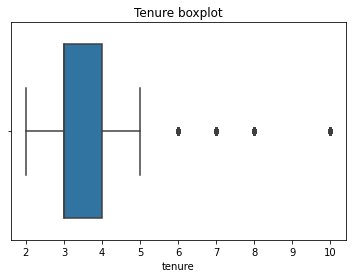

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
sns.boxplot(x=df['tenure'])
plt.title('Tenure boxplot')
plt.show()

In [12]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###
q1 = df['tenure'].quantile(0.25)
q3 = df['tenure'].quantile(0.75)
iqr = q3 - q1

lower_fence = q1 - 1.5 * iqr
upper_fence = q3 + 1.5 * iqr
print('Lower fence: ', lower_fence)
print('Upper fence: ', upper_fence)

outliers = df[(df['tenure'] < lower_fence) | (df['tenure'] > upper_fence)]
print('Nº of outliers: ', len(outliers))


Lower fence:  1.5
Upper fence:  5.5
Nº of outliers:  824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [13]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
print(df['left'].value_counts())
print()

# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
print(df['left'].value_counts(normalize=True))

0    10000
1     1991
Name: left, dtype: int64

0    0.833959
1    0.166041
Name: left, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

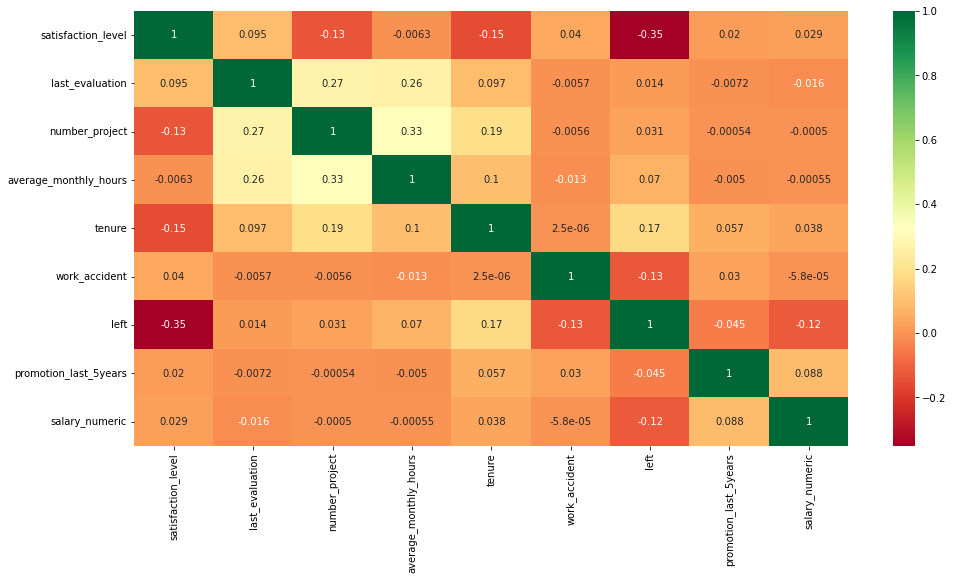

In [14]:
# Create a plot as needed
### YOUR CODE HERE ###
#The first visualization that we are going to creat will be a correlation heatmap. 
#That will show us how the variables correlate with each other, possibly giving us insights on next steps.
#For that we need to prepare the data.
salary_mapping = {'low': 0, 'medium': 1, 'high': 2}

df['salary_numeric'] = df['salary'].replace(salary_mapping)
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(16,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='RdYlGn')

The correlation heatmap show us that the last_evaluation, number_project and average_monthly_hours are positively correlated. Also that when an employee leaving is negatively correlated with their satisfaction_level and work_accident.

The next step is to check this 3 variables in a bigger depth, specifically comparing employees who left/stayed.

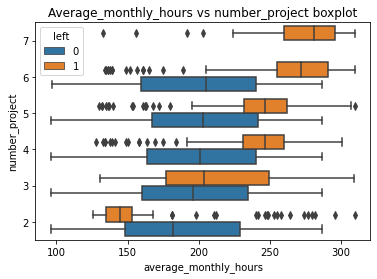

In [15]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.boxplot(data=df, x='average_monthly_hours', y='number_project', hue='left', orient='h')
plt.gca().invert_yaxis()
plt.title('Average_monthly_hours vs number_project boxplot')
plt.show()

The boxplot shows that most of the employees that are given 6+ projects and work 250+ hours leave.

Next step we will visualize the distribution of the number of project for the 2 groups of employees.

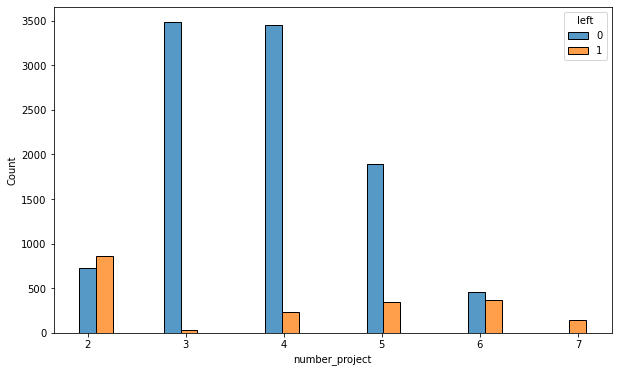

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='number_project', hue='left', multiple='dodge', shrink=2)
plt.show()

The histogram show us two main things: When employees only have 2 and 6 projects more then half leaves and with 7 projects almost no one stays. 

Next we will create a scatterplot to evaluate satisfacion_level vs last_evaluation

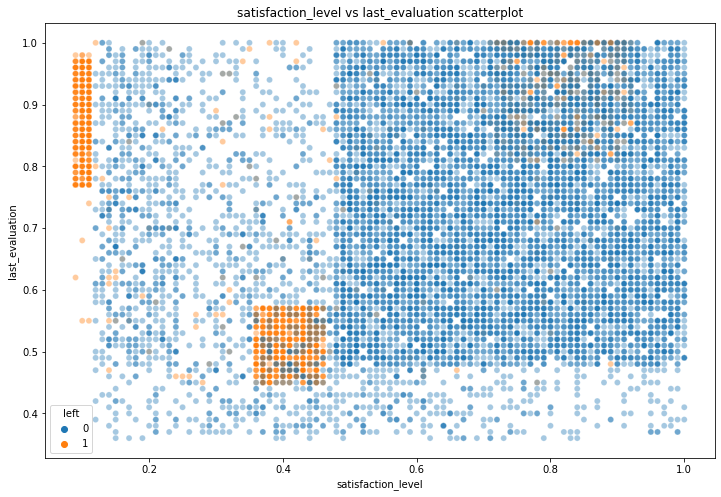

In [17]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='satisfaction_level', y='last_evaluation', hue='left', alpha=0.4)
plt.title('satisfaction_level vs last_evaluation scatterplot')
plt.show()

The scatterplot shows that we have 3 distinct groups that are leaving:
- The 'underperformer' (low satisfaction/low evaluation)
- The 'burned out' (high evaluation/low satisfaction)
- The 'high-flyers' (high evaluation/high satisfaction)

The next visualization is a histogram to discover the relation between tenure vs retention.

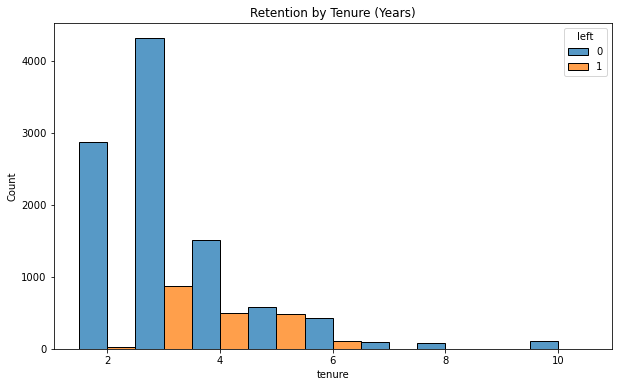

In [18]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='tenure', hue='left', multiple='dodge', discrete=True)
plt.title('Retention by Tenure (Years)')
plt.show()

We can see in the previous graph that most of the employees that leave do in the years 3,4 or 5 in the company. Almost no one leaves after that. One feedback to the hr could be to focus the retention on the mid-career employees.

Next step is to observe the relation between retention and salary.

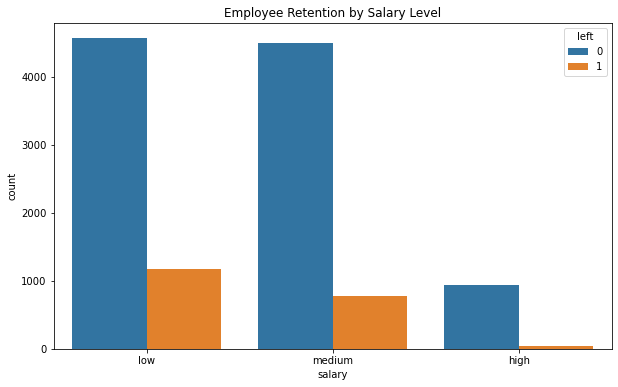

In [19]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='salary', hue='left', order=['low', 'medium', 'high'])
plt.title('Employee Retention by Salary Level')
plt.show()

We can observe that the retention is high when the salary is high and also low when the salary is lown which can be expected. Nonetheless when the saalry is medium the retention number of people who leaves is still significant, which can mean the medium-career employees from the previous chart. Possibly the burn-out group.

Next we went ahead and created a graph to find if there is any significant difference in retention throughout departments.

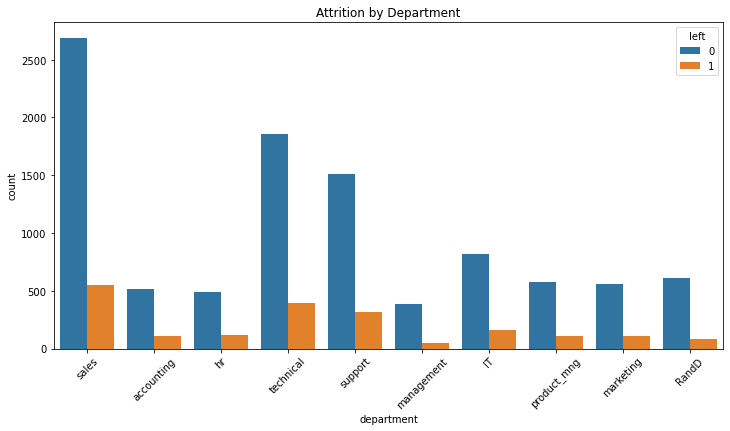

In [20]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='department', hue='left')
plt.xticks(rotation=45)
plt.title('Attrition by Department')
plt.show()

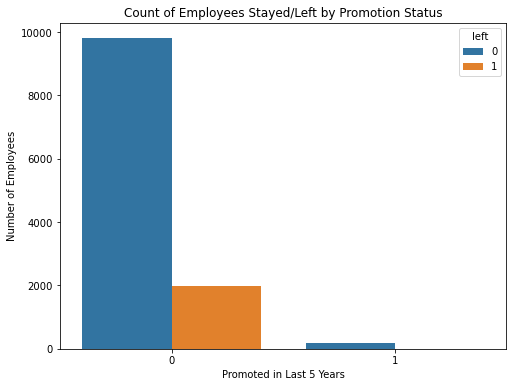

In [21]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='promotion_last_5years', hue='left')
plt.title('Count of Employees Stayed/Left by Promotion Status')
plt.xlabel('Promoted in Last 5 Years')
plt.ylabel('Number of Employees')
plt.show()

There is no obvious conclusion watching the plot.

### Insights

1. The Workload & Attrition Link
Overworked: Employees with 6-7 projects and 250+ monthly hours are at extreme risk of leaving (likely the "Burned Out" group).

Underutilized: Employees with only 2 projects also leave at high rates, suggesting a lack of engagement or "quiet quitting."

Optimal Range: Retention is highest for those with 3-4 projects.

2. The Three "Leaver" Profiles (Scatterplot Results)
The Underperformers: Low satisfaction + Low evaluation.

The Burned Out: Low satisfaction + High evaluation (top-tier talent being worked too hard).

The High-Flyers: High satisfaction + High evaluation (likely leaving for better external offers).

3. The Promotion Stagnation (New Insight)
The side-by-side count plot reveals a critical retention issue:

The Missing Bar: In the "Promoted" category, the number of people who left is nearly zero.

The Volume Issue: The vast majority of the workforce sits in the "Not Promoted" category.

The Conclusion: While promotions effectively stop people from leaving, they are so rare (approx. 2%) that they aren't being used as a real management tool.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

Our goal is to preditc wether an employee will leave the company, which is a categorical outcome variable. Yes or No. So this project is a binary classification.

### Identify the types of models most appropriate for this task.

The objective is to predict employee attrition, which is a binary classification task. While Logistic Regression is a common baseline, the EDA revealed complex, non-linear relationships and interactions between variables (such as the U-shaped correlation between project count and turnover). Therefore, a tree-based ensemble was selected. I chose Random Forest over XGBoost to prioritize model interpretability and clear feature importance for HR stakeholders, while still maintaining high predictive power.

### Modeling

Add as many cells as you need to conduct the modeling process.

In [22]:
df_final = pd.get_dummies(df, columns=['department'], drop_first=True)

y = df_final['left']
X = df_final.drop(['left', 'salary'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [23]:
### YOUR CODE HERE ###
rf = RandomForestClassifier(random_state=42)

cv_params = {
    'max_depth': [3, 5, None], 
    'max_features': [1.0],
    'max_samples': [0.7],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [2, 3],
    'n_estimators': [100, 300]
}

scoring = {'accuracy', 'precision', 'recall', 'f1'}

rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='f1')

rf_cv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [24]:
print(f"F1 Score: {rf_cv.best_score_:.4f}")

F1 Score: 0.9499


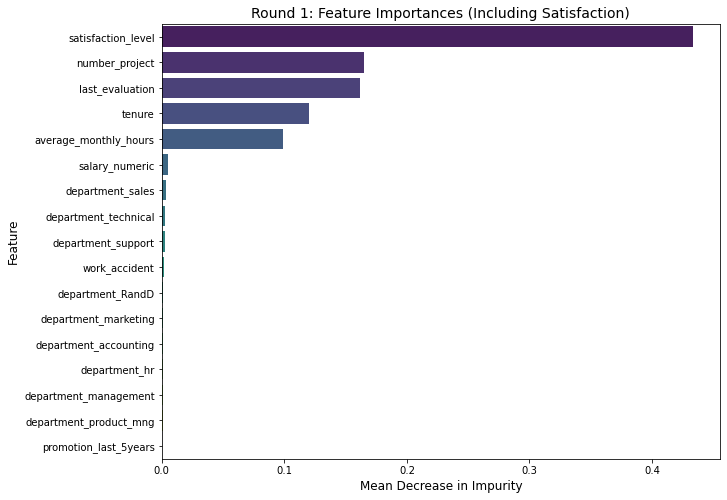

In [25]:
# 1. Extract feature importances from the Round 1 best model
importances_r1 = rf_cv.best_estimator_.feature_importances_

# 2. Create a Series for easy plotting
rf_importances_r1 = pd.Series(importances_r1, index=X.columns).sort_values(ascending=False)

# 3. Plot the results
plt.figure(figsize=(10, 8))
sns.barplot(x=rf_importances_r1, y=rf_importances_r1.index, palette='viridis')
plt.title('Round 1: Feature Importances (Including Satisfaction)', fontsize=14)
plt.xlabel('Mean Decrease in Impurity', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.show()

The Round 1 model provides excellent predictive accuracy; however, it relies heavily on satisfaction_level, which is a subjective and lagging indicator. 
To provide Salifort Motors with proactive, actionable insights, a second round of modeling is necessary. 

In Round 2, we will remove the 'satisfaction' variable to see if we can predict attrition using only objective operational data (workload, evaluation, and tenure). This allows HR to intervene through policy changes rather than just reacting to survey scores.

In [26]:
# 1. Feature Engineering
df_round2 = df_final.copy()
# Create binary 'overworked' feature (> 175 average monthly hours)
df_round2['overworked'] = (df_round2['average_monthly_hours'] > 175).astype(int)

# Drop potentially leaky and noisy variables
df_round2 = df_round2.drop(['satisfaction_level', 'average_monthly_hours', 'salary'], axis=1)

# 2. Re-split data for Round 2
y2 = df_round2['left']
X2 = df_round2.drop('left', axis=1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, stratify=y2, random_state=42)

# 3. Fit Round 2 Model
rf_cv2 = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='f1')
rf_cv2.fit(X_train2, y_train2)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [27]:
# 1. Predictions on Test Set
best_rf2 = rf_cv2.best_estimator_
y_pred2 = best_rf2.predict(X_test2)

# 2. Results
print("ROUND 2 FINAL PERFORMANCE:")
print(classification_report(y_test2, y_pred2))



ROUND 2 FINAL PERFORMANCE:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2001
           1       0.91      0.91      0.91       398

    accuracy                           0.97      2399
   macro avg       0.94      0.95      0.94      2399
weighted avg       0.97      0.97      0.97      2399



<Figure size 576x432 with 0 Axes>

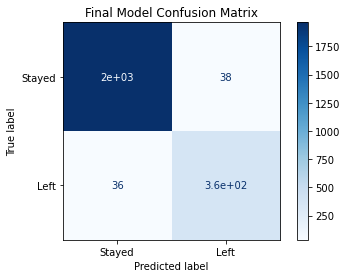

In [28]:
# 3. Confusion Matrix
plot_confusion_matrix(best_rf2, X_test2, y_test2, cmap='Blues', display_labels=['Stayed', 'Left'])
plt.title('Final Model Confusion Matrix')
plt.show()

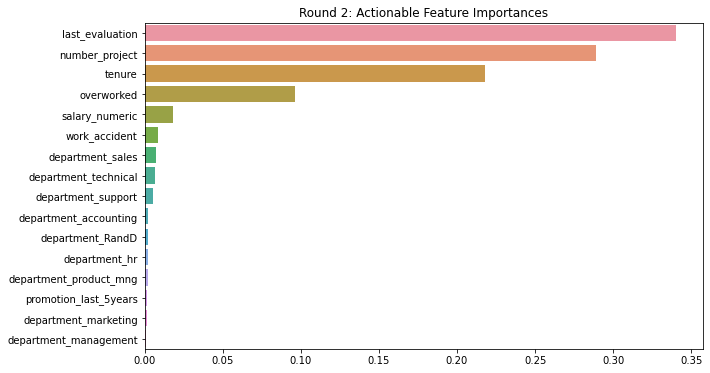

In [29]:
# Feature Importance for Round 2
importances_r2 = best_rf2.feature_importances_
rf_importances_r2 = pd.Series(importances_r2, index=X2.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=rf_importances_r2, y=rf_importances_r2.index)
plt.title('Round 2: Actionable Feature Importances')
plt.show()

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

The Random Forest model (Round 2) was selected as the champion model. By engineering an 'overworked' feature and removing 'satisfaction_level' to avoid data leakage, the model achieved an F1-score of 0.91. This indicates the model is highly effective at identifying the specific operational conditions—such as high project volume and excessive hours—that lead to turnover.

### Conclusion, Recommendations, Next Steps

The analysis proves that overwork is the primary driver of attrition at Salifort Motors. To improve retention, I recommend:

Workload Capping: Limit employees to a maximum of 5 projects.

Hours Monitoring: Flag employees working more than 175 hours/month for immediate manager check-ins.

Tenure Incentives: Create specific 'stay-bonus' or career-growth programs for employees at the 3-year and 4-year marks.

Evaluation Alignment: Re-examine the workload of 'High Performers' (high evaluation scores), as they are currently the group at the highest risk of burnout.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.